<h1>Imports and API setups<h1>

In [237]:
from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import config

# Spotify API Setup
# TODO: Remove login credentials from code
client_credentials_manager = SpotifyClientCredentials(config.client_id, config.client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Enables verbose requests tracing
sp.trace=False

<h1>Initial Api testing</h1>

In [ ]:
data = pd.read_csv('file_path.csv')

plt.title("Spotify Popularity")
data['Popularity'].plot()

In [ ]:
data.head()

## Getting the data

In [ ]:
# The id of the playlist where the data will come from
playlistID = "spotify:user:217unxkx4en4irnq4nkvgax6y:playlist:1v3tLpVLqty2FMPm4oY2rs"

# These will be the table headings in our data
myData = np.array([["Song Title", "Artist", "Popularity", "Energy", "Liveness", "Tempo"
          , "Speechiness", "Acousticness", "Instrumentalness", "Time Signature", "Danceability",
          "Key", "Duration in ms", "Loudness", "Valence", "Mode"]])

# Declare those variables as empty Strings
energy = ""
liveness = "" 
tempo = ""
speechiness = ""
acousticness = ""
instrumentalness = ""
time_signature = ""
danceability = ""
key = ""
duration_ms = ""
loudness = ""
valence = ""
mode = ""

# Can only get 100 tracks at a time so we use an offset
for offset in range(0, 500, 100):
    
    # Get 100 tracks in the playlist
    playlist = sp.user_playlist_tracks("spotify:user:217unxkx4en4irnq4nkvgax6y", playlistID, "",100,offset)
    
    # Add a delay because we are querying for a lot of data
    time.sleep(10)
    
    for item in playlist['items'] :
        
        # Now for each song in the playlist we want to get certain features
        track = item['track']
        
        trackId = track['uri']
        songTitle = track['name']
        
        # A song might have more than one artist so we make a list of all of them
        #TOFIX:  Not elegant at the moment, maybe make it a list
        artistName = ""
        for artist in track['artists']:
            artistName = artistName + artist['name'] + ","
        artistName.rstrip(',')
        
        # Print to check
        print("Song title: ", songTitle)
        print("Artist: ", artistName)

        # Get features for the track
        features = sp.audio_features([trackId])
        popularity = track['popularity']
        
        # If the feature array is empty this usually means something has gone wrong 
        # with the request so this stops the program from failing in that case
        if features[0] != None :

            energy = features[0]['energy']
            liveness = features[0]['liveness'] 
            tempo = features[0]['tempo']
            speechiness = features[0]['speechiness']
            acousticness = features[0]['acousticness']
            instrumentalness = features[0]['instrumentalness']
            time_signature = features[0]['time_signature']
            danceability = features[0]['danceability']
            key = features[0]['key']
            duration_ms = features[0]['duration_ms']
            loudness = features[0]['loudness']
            valence = features[0]['valence']
            mode = features[0]['mode']
            
        # Create a new row of data using the features above
        newRow = np.array([songTitle, artistName, popularity, energy, liveness, tempo, speechiness, acousticness, instrumentalness, time_signature,
                  danceability, key, duration_ms, loudness, valence, mode])
        # Stack the rows vertically to create a matrix
        myData = np.vstack([myData, newRow])
  
        print("Popularity: ", popularity)
        print("Energy: ", energy)
        print("Liveness: ", liveness)
        print("Tempo: ", tempo)
        print("Speechiness: ", speechiness)
        print("Acousticness: ", acousticness)
        print("Instrumentalness: ", instrumentalness)
        print("Time signature: ", time_signature)
        print("Danceability: ", danceability)
        print("Key: ", key)
        print("Duration ms: ", duration_ms)
        print("Loudness: ", loudness)
        print("Valence: ", valence)
        print("Mode: ", mode)
        print("============================================================")

# Writing the data from the Spotify API to a CSV 
df = pd.DataFrame(myData)
df.to_csv("file_path_big.csv", encoding="utf-8", header=None, index=False)

# Read the data from the CSV to make sure everything is fine
data = pd.read_csv('file_path_big.csv')
data.head()

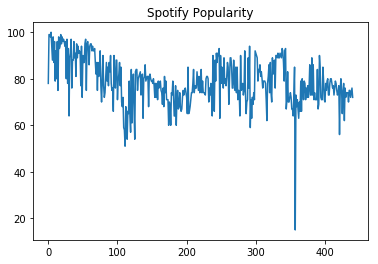

In [47]:
plt.title("Spotify Popularity")
data['Popularity'].plot()

## Feature description: 
![alt text](features0.png "Description of popularity")
![alt text](features1.png "Description of audio features part 1")
![alt text](features2.png "Description of audio features part 1")

## Read data from CSV

In [163]:
# Read the data from the file
data = pd.read_csv('file_path_big.csv')
data.head()
print("Number of entries in original data: " + str(len(data.index)))

Number of entries in original data: 441


## Analyzing the data

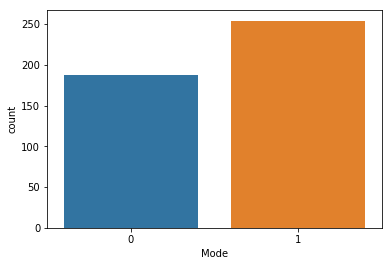

In [8]:
sns.countplot(x="Mode", data=data)

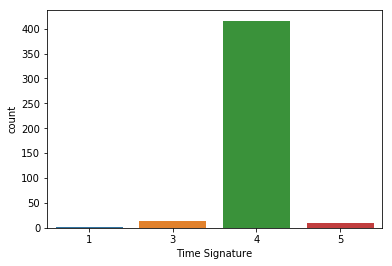

In [10]:
sns.countplot(x="Time Signature", data=data)

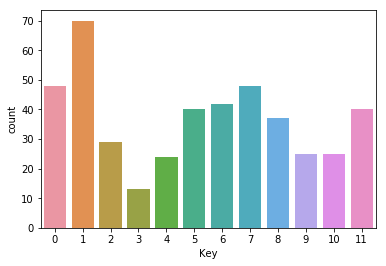

In [11]:
sns.countplot(x="Key", data=data)

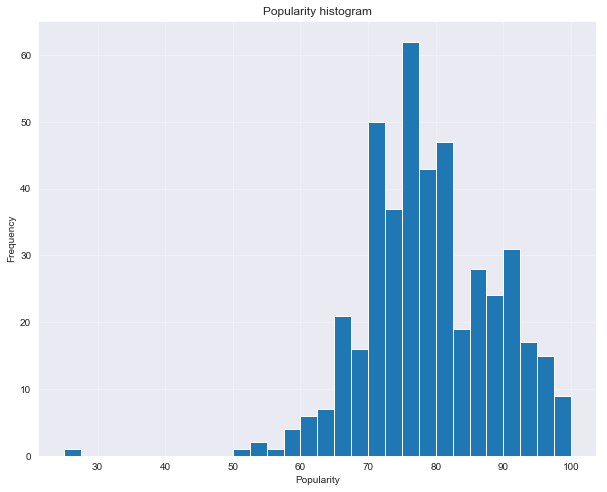

In [52]:
data['Popularity'].plot.hist(bins=30, rwidth=10,figsize=(10,8))
plt.xlabel('Popularity')
plt.title("Popularity histogram")
plt.grid(alpha=0.3)

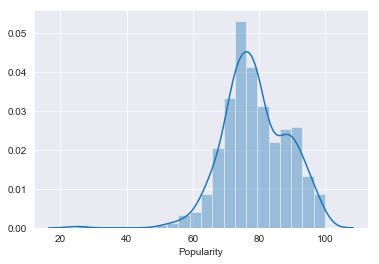

In [39]:
sns.set_style('darkgrid')
sns.distplot(data["Popularity"])

In [236]:
# Label data according to a threshold for nicer plotting
labeled_data = data.copy()
threshold = 85
labels = []

# The threshold is on Popularity, see above for description of that feature
for item in data['Popularity']:
    if item > threshold:
        labels.append(1)
    else:
        labels.append(0)
labeled_data['Is_Popular'] = labels

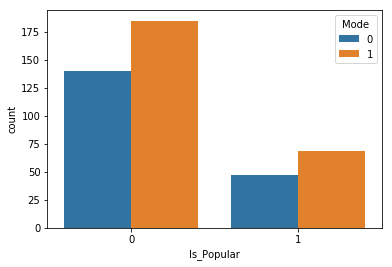

In [209]:
sns.countplot(x="Is_Popular", hue = "Mode", data=labeled_data)

Text(0.5,1,'Duration and popularity')

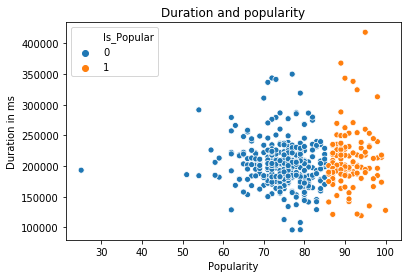

In [231]:
sns.scatterplot(x="Popularity", y = "Duration in ms" , hue = "Is_Popular", data=labeled_data).set_title("Duration and popularity")

Text(0.5,1,'Instrumentalness and popularity')

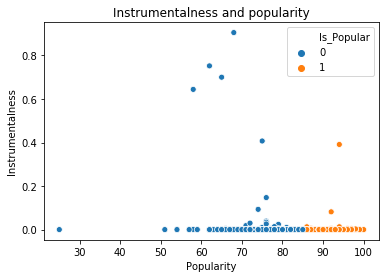

In [233]:
sns.scatterplot(x="Popularity", y = "Instrumentalness" , hue = "Is_Popular", data=labeled_data).set_title("Instrumentalness and popularity")

Text(0.5,1,'Loudness and popularity')

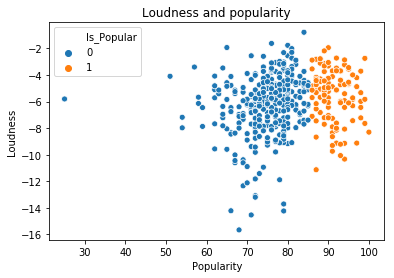

In [234]:
sns.scatterplot(x="Popularity", y = "Loudness" , hue = "Is_Popular", data=labeled_data).set_title("Loudness and popularity")

## Data wrangling

In [ ]:
# Check if we have any null items in our data
data.isnull().sum()

## Setting popularity threshold and adding lables to data

In [201]:
# Make a copy of the data to which we will ad labels and then remove any 
# columns that we will not need

final_data = data.copy()
threshold = 85
labels = []
for item in data['Popularity']:
    if item > threshold:
        labels.append(1)
    else:
        labels.append(0)
final_data['Is_Popular'] = labels
final_data.head()

# Drop unnecessary columns from original data
final_data.drop(['Song Title', 'Artist', 'Popularity'],1, inplace=True)

## Train data

In [202]:
# X will be our examples and y will be our labels
X = final_data.drop('Is_Popular', axis=1)
y = final_data['Is_Popular']
#X.head()

## Splitting data

In [203]:
# We split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print("Items in training data set : ", str(len(X_train.index)))
print("Items in testing data set: ", str(len(X_test.index)))

Items in training data set :  220
Items in testing data set:  221


## Model training and prediction

In [204]:
# Initialize Logistic Regression Model
logmodel = LogisticRegression()

# Train the model
logmodel.fit(X_train, y_train)

# Classifiy test examples
predictions = logmodel.predict(X_test)

# Print the accuracy score of the model
accuracy_score(y_test, predictions)

0.68325791855203621

In [ ]:
# Print the classification report of the model
classification_report(y_test, predictions)

In [206]:
# Print the confusion matrix
confusion_matrix(y_test, predictions)

array([[151,   0],
       [ 70,   0]], dtype=int64)